# **Variables & Code Best Practices to Create EC2**

# **✅ Best Practices for EC2 in Terraform**
# **1. Use variables.tf for Inputs**

Define values like instance type, AMI, region, tags, etc.



```
# variables
provider "aws" {
  region = var.aws_region
}

data "aws_ami" "amazon_linux" {
  most_recent = true
  owners      = ["amazon"]

  filter {
    name   = "name"
    values = ["amzn2-ami-hvm-*-x86_64-gp2"]
  }
}

resource "aws_instance" "my_ec2" {
  ami    = data.aws_ami.amazon_linux.id
  instance_type = var.instance_type

  tags = {
    Name = "var.instance_name"
  }
}
```



# **2. Use main.tf for Logic**
Write the infrastructure code referencing variables.




```
variable "aws_region" {
  default = "us-east-1"
}

variable "instance_type" {
  default     = "t3.micro"
}

variable "instance_name" {
  default     = "MyFirstEC2Instance"
}
```



# **3. Use outputs.tf to Show Results**
Display public IP, instance ID, etc.



```
output "instance_public_ip" {
  value = aws_instance.my_ec2.public_ip
}
```



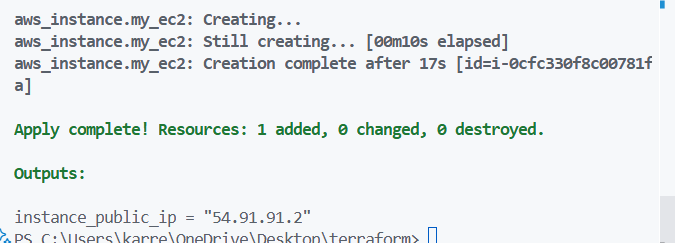

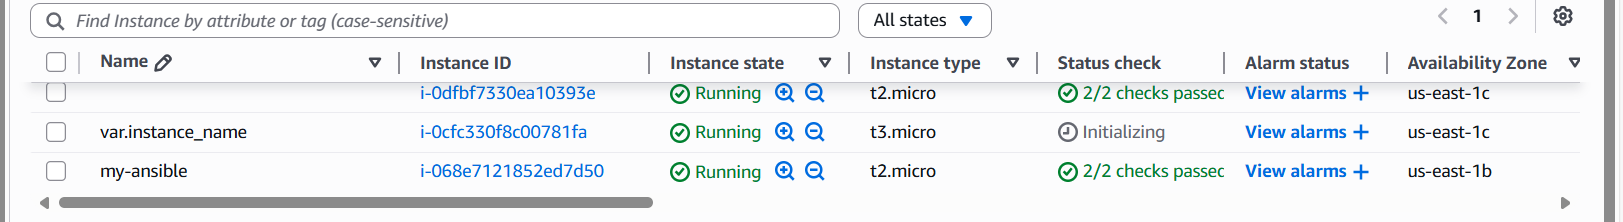

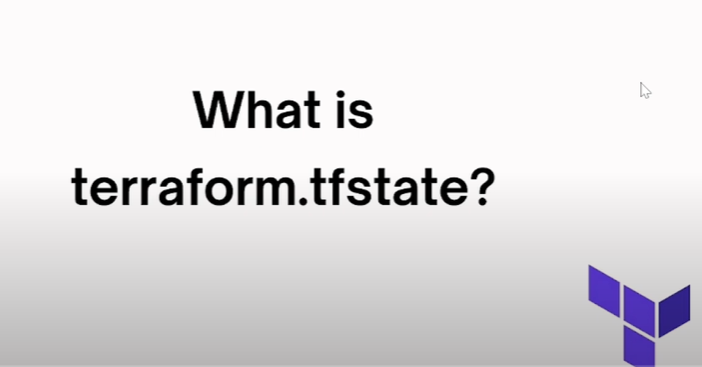

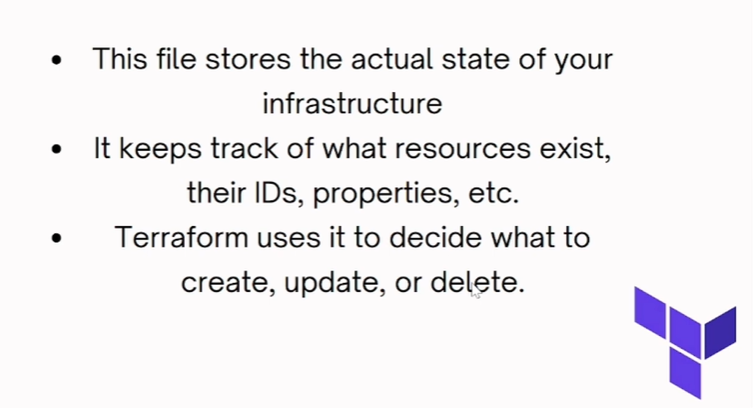

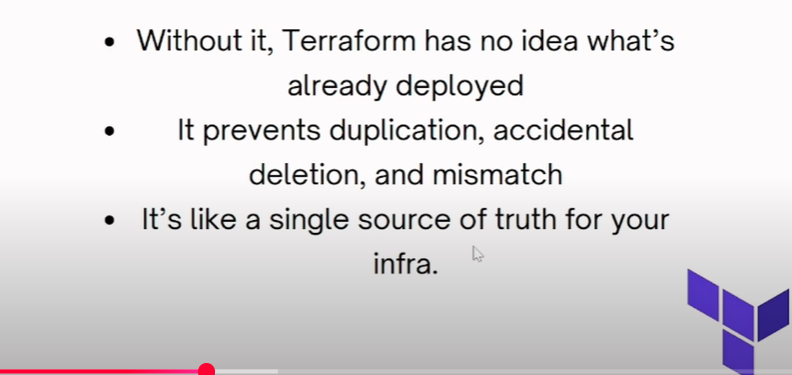

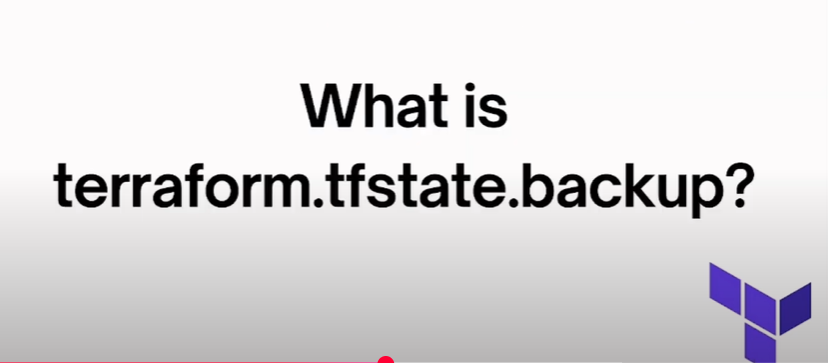

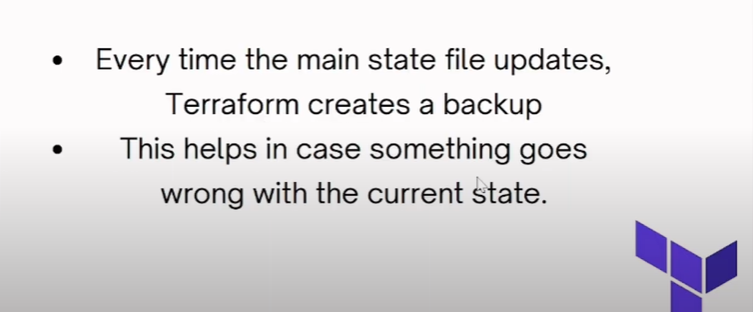

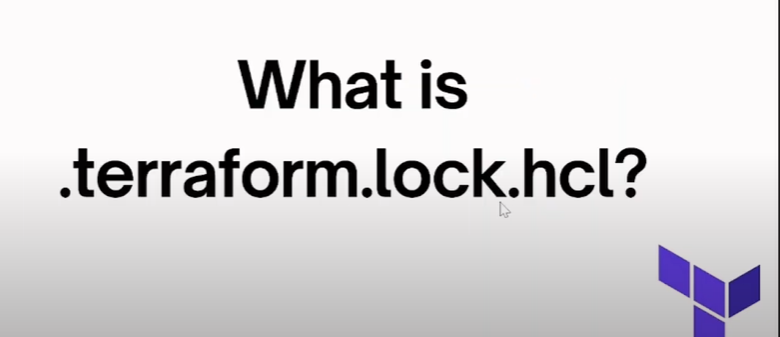

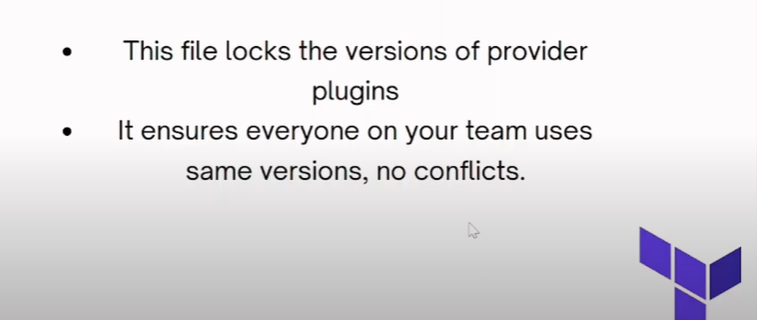

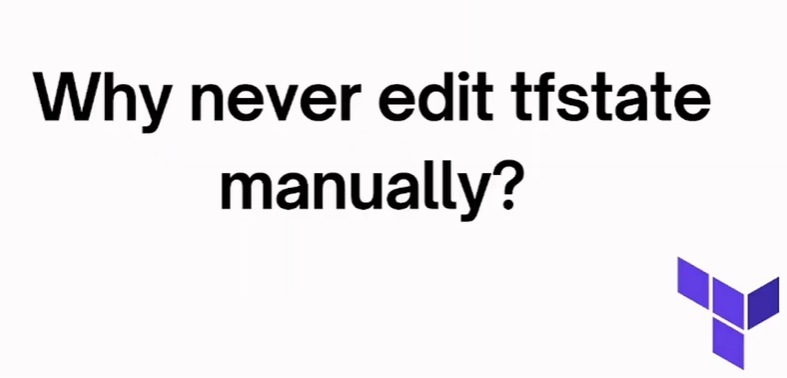

![image.png](
  
)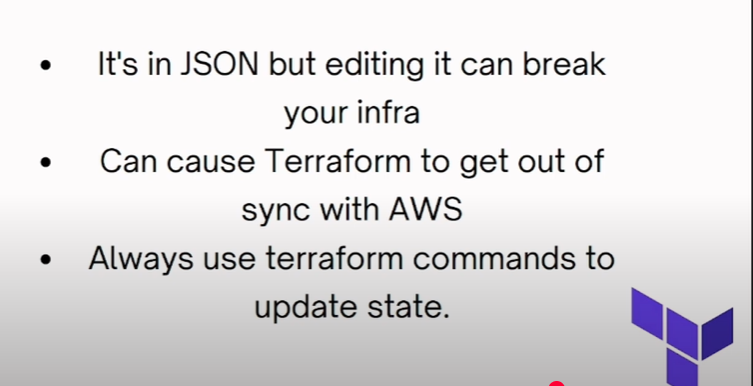

# **Note:the updation can be done by main.tf but not terraform.tfstate**

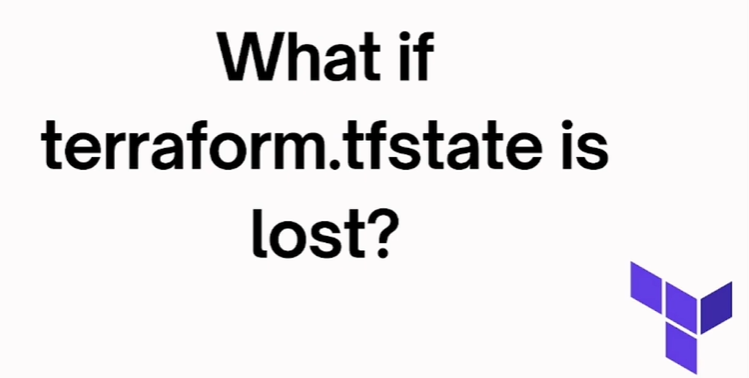

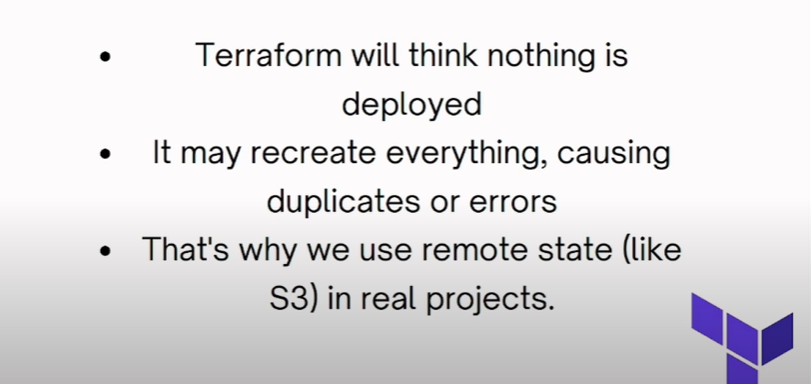

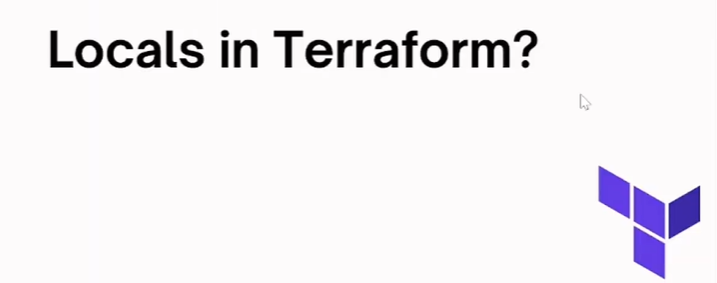

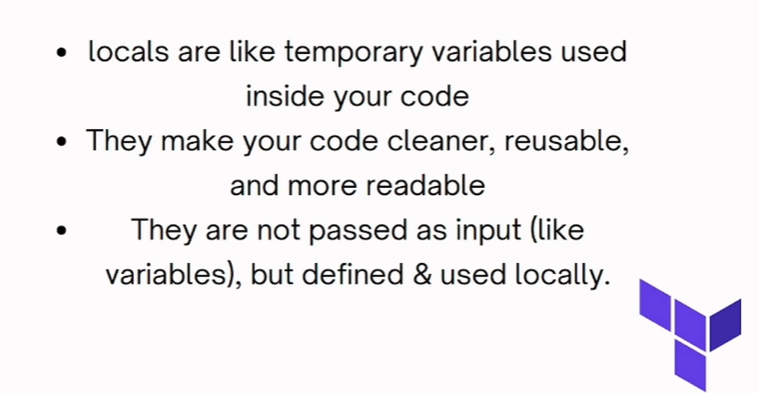

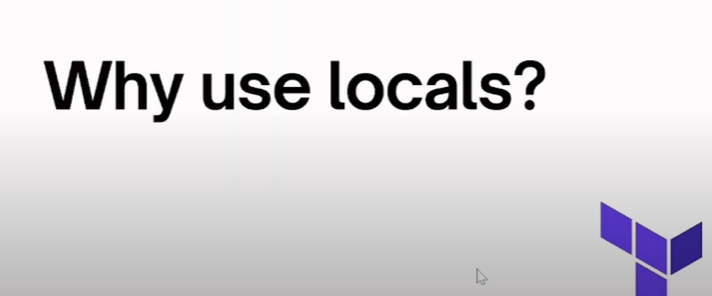

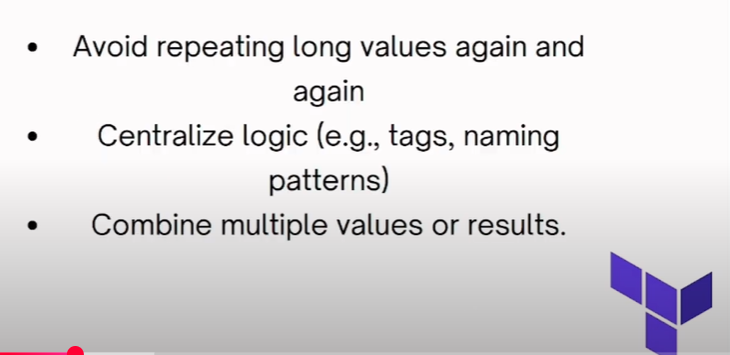

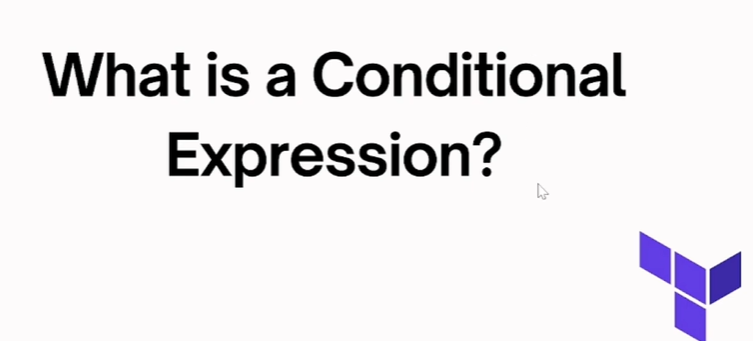

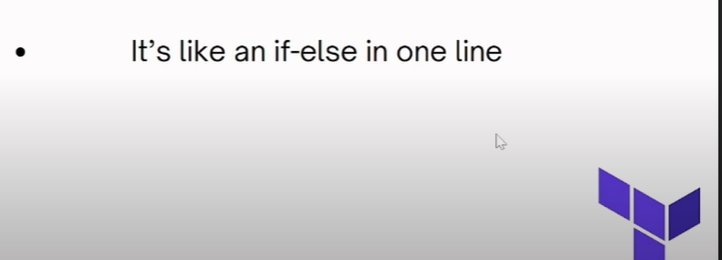

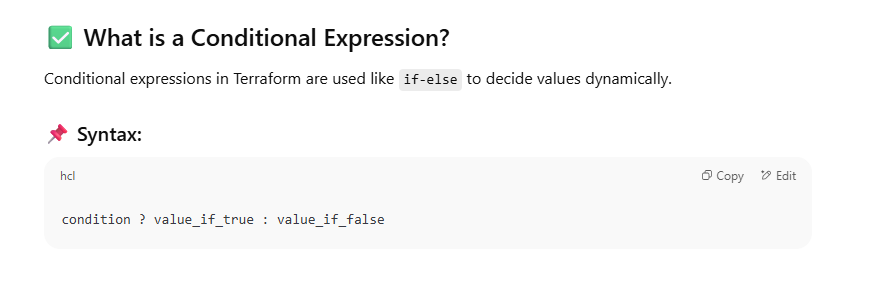

# **main.tf**



```
# main.tf
provider "aws" {
  region = var.aws_region
}

data "aws_ami" "amazon_linux" {
  most_recent = true
  owners      = ["amazon"]

  filter {
    name   = "name"
    values = ["amzn2-ami-hvm-*-x86_64-gp2"]
  }
}

locals {
  name_tag = var.instance_type == "t3.micro" ? "Micro Instance" : "Standard Instance"
}

resource "aws_instance" "my_ec2" {
  ami           = data.aws_ami.amazon_linux.id
  instance_type = var.instance_type

  tags = {
    Name = local.name_tag
  }
}

```



# **variables.tf**



```
# variables.tf
variable "aws_region" {
  default = "us-east-1"
}

variable "instance_type" {
  default = "t3.micro"
}

variable "instance_name" {
  default = "MyFirstEC2Instance"
}

```



# **outputs.tf**



```
# outputs.tf
output "instance_public_ip" {
  value = aws_instance.my_ec2.public_ip
}

```



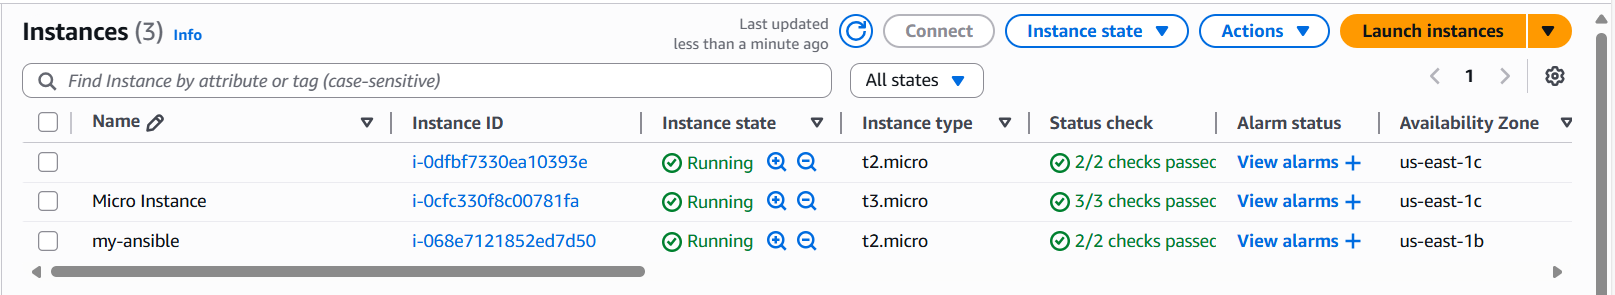